In [1]:
import geohash
import pandas as pd
import numpy as np
import random
import math
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

from init import init
from eva import eva
from nond import nond
from ope import ope
from tour import tour
from rep import rep
#读取距离矩阵
dis = pd.read_csv('C:/Users/sjw/Desktop/paper/data/dis10.csv',header=None,low_memory=False).values.tolist()

#生成初始停车顺序，V用户，gen代数，pop种群大小，M目标函数数量，
V = len(dis)
M = 2
gen = 10
pop = 50
#初始化与排序
chro,train = init(pop,V,dis)
print(chro)
chro = nond(chro,M,V)
#选择参数
tour_size = 2
pour_size = round(pop/2)
chro_lr = []

[[2, 7, 0, 5, 3, 8, 9, 6, 1, 4, 42513.45071253243, 0.0], [0, 8, 5, 4, 6, 3, 1, 7, 9, 2, 41431.21909809724, 0.0], [2, 9, 6, 8, 7, 3, 4, 5, 1, 0, 57309.43149639867, 0.0], [7, 3, 6, 5, 4, 8, 0, 1, 2, 9, 41230.775179039265, 0.0], [3, 8, 7, 4, 0, 1, 2, 6, 5, 9, 42401.827982290255, 0.0], [4, 3, 5, 0, 2, 7, 8, 9, 1, 6, 55567.35444955889, 0.0], [5, 6, 7, 2, 4, 0, 1, 8, 9, 3, 40468.26416421296, 0.0], [6, 3, 7, 2, 0, 5, 1, 4, 8, 9, 42306.278209439224, 0.0], [3, 1, 2, 6, 0, 9, 4, 5, 7, 8, 44672.994137933296, 0.0], [2, 7, 3, 5, 8, 9, 0, 4, 1, 6, 41397.593749008054, 0.0], [8, 1, 3, 9, 5, 2, 4, 7, 6, 0, 57809.07601703014, 0.0], [7, 1, 5, 4, 2, 0, 6, 8, 9, 3, 40563.813937064, 0.0], [4, 9, 2, 8, 0, 7, 1, 3, 5, 6, 47739.42306271431, 0.0], [1, 4, 3, 7, 9, 2, 5, 0, 6, 8, 40524.18162812057, 0.0], [6, 4, 3, 0, 7, 9, 8, 5, 1, 2, 56713.6826037757, 0.0], [0, 1, 7, 5, 8, 3, 6, 9, 2, 4, 44656.27836161056, 0.0], [7, 5, 3, 0, 1, 2, 4, 9, 8, 6, 43672.53839215816, 0.0], [3, 0, 4, 8, 6, 5, 1, 7, 2, 9, 41431.21909809

In [2]:
print(chro)

[[4, 6, 7, 5, 3, 2, 0, 1, 8, 9, 40050.16205046404, 0.0, 1, -inf], [5, 6, 7, 2, 4, 0, 1, 8, 9, 3, 40468.26416421296, 0.0, 2, -inf], [1, 4, 3, 7, 9, 2, 5, 0, 6, 8, 40524.18162812057, 0.0, 3, -inf], [7, 1, 5, 4, 2, 0, 6, 8, 9, 3, 40563.813937064, 0.0, 4, -inf], [8, 6, 7, 9, 2, 4, 5, 3, 0, 1, 40925.221161806025, 0.0, 5, -inf], [7, 3, 6, 5, 4, 8, 0, 1, 2, 9, 41230.775179039265, 0.0, 6, -inf], [2, 7, 3, 5, 8, 9, 0, 4, 1, 6, 41397.593749008054, 0.0, 7, -inf], [8, 6, 5, 7, 0, 4, 2, 9, 3, 1, 41400.42549029704, 0.0, 8, -inf], [0, 8, 5, 4, 6, 3, 1, 7, 9, 2, 41431.21909809724, 0.0, 9, -inf], [3, 0, 4, 8, 6, 5, 1, 7, 2, 9, 41431.21909809724, 0.0, 9, -inf], [2, 5, 0, 7, 9, 8, 1, 6, 4, 3, 41816.417486937964, 0.0, 10, -inf], [2, 1, 8, 0, 6, 3, 5, 7, 4, 9, 42056.49371493936, 0.0, 11, -inf], [0, 5, 2, 1, 6, 8, 3, 7, 9, 4, 42056.49371493936, 0.0, 11, -inf], [0, 4, 6, 5, 7, 1, 2, 3, 9, 8, 42115.242920135956, 0.0, 12, -inf], [6, 3, 7, 2, 0, 5, 1, 4, 8, 9, 42306.278209439224, 0.0, 13, -inf], [3, 8, 7, 4, 0,

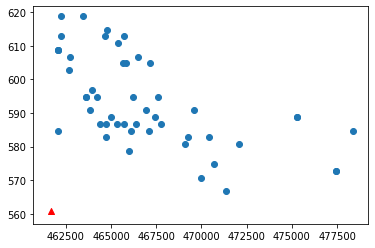

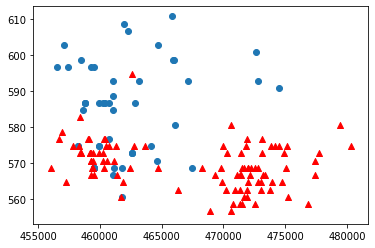

In [2]:
for g in range(gen):
    #选择交叉
    chro = tour(chro,pour_size,tour_size)
    ope(chro,M,V,dis,train)
    #回归变异，y和lr_x是回归输入输出
    y = []
    lr_x = []
    for i in range(len(train)):
        y.append(train[i][V])
        lr_x.append(train[i][0:V])
    y = np.reshape(y,newshape=(i+1,1))
    
    lr = LinearRegression()
    lr.fit(lr_x,y)
    lastlist = np.argsort(lr.coef_[0],axis=0)
    #gentic变异个体染色体，sup变异个体回归形态编码
    gentic = lastlist.tolist()
    sup = eva(gentic,V,dis)
    #变异个体训练集基因
    #变异个体集合
    chro_lr.append(gentic)
    #排序
    chro = nond(chro,M,V)
    #继承淘汰
    chro = rep(chro,M,V,pop)
    
    #画图
    if(g%99==0):
        Y = np.array(chro_lr)
        X = np.array(chro)
        plt.clf()
        plt.scatter(X[:, 745], X[:, 746])
        plt.scatter(Y[:, 745], Y[:, 746], c='r', marker='^')
        plt.pause(0.1) # 关闭画图的窗口
        plt.ioff()

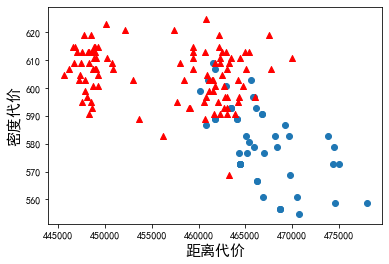

In [3]:
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False

#设置X轴标签  
plt.xlabel('距离代价',fontsize=15)  
#设置Y轴标签  
plt.ylabel('密度代价',fontsize=15)

Y = np.array(chro_lr)
X = np.array(chro)
plt.scatter(X[:, 745], X[:, 746])
plt.scatter(Y[:, 745], Y[:, 746], c='r', marker='^')

In [3]:
for i in range(len(chro)):
    print(chro[i][745:])

[462207.407468717, 586.7500000000001, 1, 1.138820887891191]
[467039.7931402256, 576.75, 1, 1.3308172090847756]
[462207.407468717, 586.7500000000001, 1, 1.7388208878911908]
[470555.3907133517, 570.7500000000001, 1, -inf]
[461586.945391157, 610.7500000000001, 1, -inf]
[467504.7102465684, 582.7500000000001, 2, -inf]
[461738.1274933935, 616.7500000000002, 2, -inf]
[462401.94261694275, 590.75, 2, 1.5169866492282833]
[465737.00603901525, 588.7500000000001, 2, 1.120179993396643]
[463208.5096375364, 592.7500000000001, 3, 1.3199351370602668]
[473561.2434644257, 582.7500000000002, 3, -inf]
[462424.5732998032, 596.7500000000002, 3, -inf]
[467578.53827597684, 584.75, 3, 1.6438933684457853]
[467204.53869706206, 592.7500000000001, 4, 0.5989246302565817]
[464857.27216465375, 596.75, 4, 0.6671228097348822]
[466072.1683326947, 594.75, 4, 0.4741319456253919]
[463042.4734538081, 618.7500000000001, 4, -inf]
[468838.2379442275, 588.7500000000001, 4, 0.5684352640042165]
[469765.62371782557, 586.750000000000